# Car Price Prediction Multiple Linear Regression

## Data Understanding
This step is necessary for us to understand the data that we are going to deal with our model. Understanding the types of features and samples are necessary for data processing for it to be effective in the later stages of developing our model.

### Import Libraries

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

### Load Dataset

In [93]:
pd.set_option('display.max_columns', None) # This is to display all columns
cars = pd.read_csv('CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Reviewing the Dataset

#### 1. Determine the dimension of the dataset

In [94]:
rows, columns = cars.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 205
Number of columns: 26


#### 2. Analyze the dataset information

In [95]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### 3. Convert "symboling" as catergorical data
After referring to the data dictionary, symbolling is a categorical data so we need to convert it. 

In [96]:
cars['symboling'] = cars['symboling'].astype('object')

#### 3. Determine continuous and categorical features of your dataset
Categorical: object <br>
Numerical: float64, int64

In [97]:
categorical = cars.select_dtypes(include=['object']).columns
continuous = cars.select_dtypes(include=['float64', 'int64']).columns

print(f"Number of categorical features: {len(categorical)}")
print(f"Number of continuous features: {len(continuous)}")

Number of categorical features: 11
Number of continuous features: 15


In [98]:
print("\nCategorical Features:")
print(categorical)
print("\nContinuous Features:")
print(continuous)


Categorical Features:
Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

Continuous Features:
Index(['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


#### 4. Categorical Data Descriptions

In [99]:
cars.describe(include='object')

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205,205
unique,6,147,2,2,2,5,3,2,7,7,8
top,0,peugeot 504,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,67,6,185,168,115,96,120,202,148,159,94


#### 5. Continuous Data Descriptions

In [100]:
cars.describe(include=['float64', 'int64']).round(2)

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,103.00,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,59.32,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,1.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,52.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,103.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,154.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,205.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


#### 6. Checking if there are NaN Values in the Dataset

In [101]:
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

#### 7. Checking for Duplicate Values

In [102]:
print(f"Duplicate entries in the dataset are {(cars.duplicated().sum())}")

Duplicate entries in the dataset are 0


#### 8. Show Dataset with Categroical Data Only

In [103]:
cars.select_dtypes(include='object').head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi


#### 9. Show Dataset with Continuous Data Only

In [104]:
cars.select_dtypes(include=['float64', 'int64']).head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


## Data Cleaning
This step is necessary to be done for us to make corrections on the errors in our datasets. This is for us to prepare our dataset for the data visualization/exploratory data analysis (EDA).

#### 1. Cleaning CarName Feature

Separating the Company Name and the Car Model from the CarName Feature

In [105]:
cars['CompanyName'] = cars['CarName'].apply(lambda x: x.split(" ")[0])

#### 2. Dropping CarName column inplace of the CompanyName

In [106]:
cars.drop(columns='CarName', inplace=True)
cars.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [107]:
cars.insert(0, 'CompanyName', cars.pop('CompanyName'))
cars.head()

,CompanyName,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,alfa-romero,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,alfa-romero,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,audi,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,audi,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### 3. Inspecting CopmanyName Feature

In [109]:
cars['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### 4. Fixing Mispelled Company Names

There are some names that need to be fixing and the data entries that needed fixing is as follows:

- maxda -> mazda
- Nissan -> nissan
- porcshce -> porsche
- toyouta -> toyota
- vokswagen & vw -> volkswagen

In [110]:
cars['CompanyName'].replace({
    'maxda': 'mazda',
    'Nissan': 'nissan',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}, inplace=True)
cars['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## Data Visualzation / Exploratory Data Analysis (EDA)
This is a necessary step due to the data having some entries that needs to be processed. Also, we need to analyze the given dataset so we can evaluate what specific variables *correlates* to our *dependent variable* (price).

#### 1. Visualizing the Independent Variable (Price)

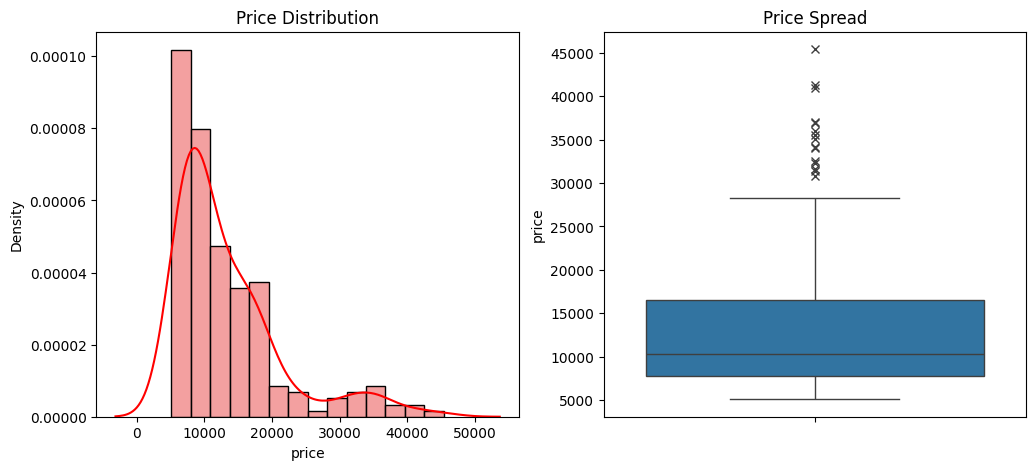

In [166]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(cars['price'], stat="density", color="lightcoral")
sns.kdeplot(cars['price'], color="red", bw_adjust=1, label="KDE Curve")
plt.title('Price Distribution')

plt.subplot(1,2,2)
plt.title('Price Spread')
sns.boxplot(y=cars['price'], flierprops={"marker": "x"})

plt.show()

#### 2. Visualizing Categorical Data

In [172]:
cars.select_dtypes(include='object').columns

Index(['CompanyName', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')